In [9]:
%matplotlib inline

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

INF = 1000000000
##n = 2
##m = 30000
min_alpha = 0.0
max_alpha = 10.0
max_it = 10000

#make data ye sadegh
noiseSize = 2
size = 1000

######## old
# sample = np.arange(size*2).reshape( (2, size) )
# sample[1] = np.sqrt(sample)[0]
# sample[1] = sample[1] + (np.random.rand(1,size) - .5) * noiseSize*2
# sample = sample.T
############

######## new
noiseSize = 100
size = 1000

sample = np.arange(size*2).reshape( (2, size) )
# sample[1] = np.sqrt(size - sample)[0]
sample[1] = sample[0] + 500
sample[1] = sample[1] + (np.random.rand(1,size) - .5) * noiseSize*2
sample = sample.T
##############


data = sample
n = 2
m = data.shape[0]
x = data[:, :n-1]
x = np.concatenate((np.ones((1,m)), x.T)).T
print x
y = np.array( data[:,-1] )
theta = np.ones(n)
print y

#make chert input :D
#x = np.ones((m,n))
#y = np.random.random(m)
#for i in range(0,m):
#    y[i] += 1
#    for j in range(1,n):
#        x[i][j] = i*j
#        y[i] += i*j*3

#feature scaling
x_min = x.min(0)
x_max = x.max(0)
x_mean = x.mean(0)
def feature_scaling(feature_num , a):
    return (a - x_mean[feature_num]) / (x_max[feature_num] - x_min[feature_num])

#for j in range(1,n):
#    for i in range(0,m):
#        x[i][j] = feature_scaling(j,x[i][j])

def Incode_features_scaling(vec):
    ans = theta[0]
    for i in range(1,vec.shape[0]):
        ans += feature_scaling(i , vec[i]) * theta[i]
    return ans

xT = x.transpose()
prev_j = -1
count_it = 0
exit = False
while count_it < max_it :
    alpha = (max_alpha+min_alpha)/2
    count_it += 1
    h = np.dot(x , theta)
    loss = h - y
    gradient = np.dot(xT , loss)
    theta = theta - alpha * gradient / m
    j = np.sum(loss ** 2) / (2*m)
    if prev_j != -1 :
        if prev_j < j :
            max_alpha = alpha
            theta = np.ones(n)
            prev_j = -1
            count_it = 0
    prev_j = j;
    if exit == True:
        count_it = max_it
print("ans ======== ")
print(theta)
print(alpha)
a = np.array([1,400])
print theta[0]+theta[1]*400
#print Incode_features_scaling(a)



[[   1.    0.]
 [   1.    1.]
 [   1.    2.]
 ..., 
 [   1.  997.]
 [   1.  998.]
 [   1.  999.]]
[ 542  490  516  409  432  452  508  572  599  557  600  567  414  534  613
  582  580  498  514  593  449  590  461  493  539  597  539  455  455  449
  449  582  568  608  447  570  531  611  526  578  568  503  548  493  624
  470  470  463  565  478  498  506  460  505  531  577  630  512  619  637
  522  523  522  500  575  555  537  532  538  622  550  593  491  574  601
  645  552  636  676  618  673  670  489  549  654  604  671  528  607  590
  630  519  539  662  654  599  571  599  585  555  549  699  651  662  621
  574  515  695  677  690  661  568  637  613  663  621  668  523  555  705
  552  617  664  530  532  687  590  568  710  714  588  704  580  704  643
  716  715  662  602  646  666  590  616  646  545  677  739  666  561  732
  585  716  695  658  601  626  618  746  704  565  642  718  639  670  715
  685  657  757  662  680  693  701  732  604  706  604  703  692 

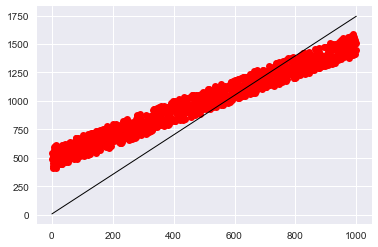

In [13]:
plt.plot(x[:,1], y, 'ro')
plt.plot([0, m], [theta[0],  theta[0] + m*theta[1]], 'k-', lw=1)